/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/2856676979.py:63: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/2856676979.py:64: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/2856676979.py:65: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/2856676979.py:68: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis

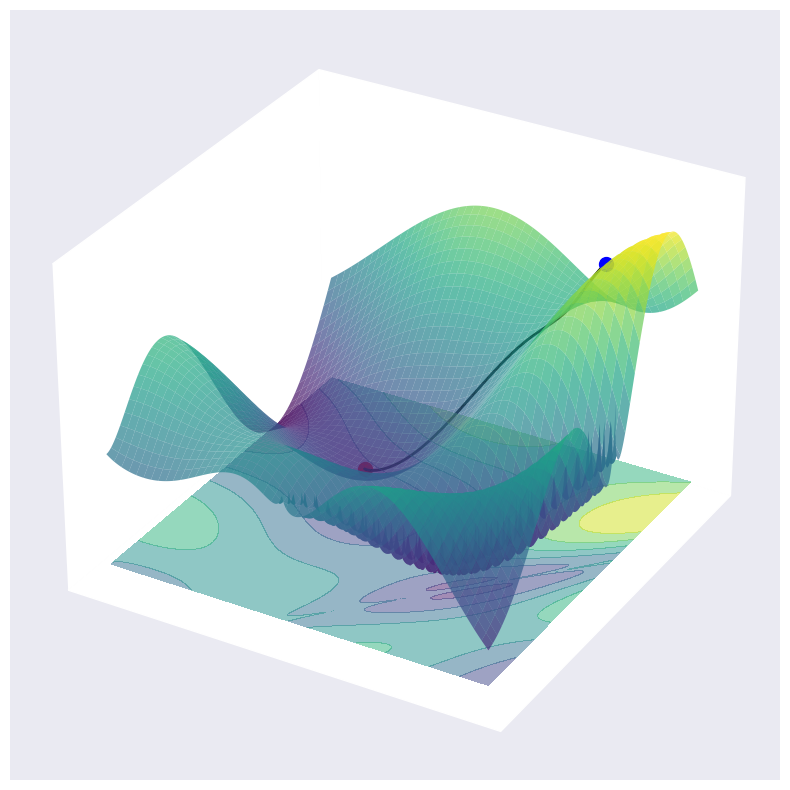

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def eggholder_function(x, y):
    """Eggholder function."""
    return -(y + 47) * np.sin(np.sqrt(np.abs(x/2 + (y + 47)))) - x * np.sin(np.sqrt(np.abs(x - (y + 47))))

def gradient(x, y):
    """Approximate gradient of the Eggholder function using finite differences."""
    delta = 1e-5
    df_dx = (eggholder_function(x + delta, y) - eggholder_function(x - delta, y)) / (2 * delta)
    df_dy = (eggholder_function(x, y + delta) - eggholder_function(x, y - delta)) / (2 * delta)
    return np.array([df_dx, df_dy])


def gradient_descent(starting_point, learning_rate, num_iterations):
    """Perform gradient descent."""
    path = []
    current_point = starting_point
    for _ in range(num_iterations):
        path.append(current_point)
        grad = gradient(*current_point)
        current_point = current_point - learning_rate * grad
    return np.array(path)

# Create a grid of points
x = np.linspace(-30, 70, 400)
y = np.linspace(-30, 60, 400)
X, Y = np.meshgrid(x, y)
Z = eggholder_function(X, Y)

# Gradient Descent
starting_point = np.array([58, 38])
path = gradient_descent(starting_point, 0.1, 500)
path_z = eggholder_function(path[:, 0], path[:, 1])
end_point = path[-1]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none', antialiased=True)
ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z), cmap='viridis', alpha=0.5)
ax.plot(path[:, 0], path[:, 1], path_z, color='black', linewidth=2.0) #label='Gradient Descent Path')
ax.scatter(*starting_point, eggholder_function(*starting_point), color='blue', s=100, zorder=5)
ax.scatter(*end_point, eggholder_function(*end_point), color='red', s=100, zorder=5)
#ax.set_xlabel('X', fontsize=14)
#ax.set_ylabel('Y', fontsize=14)

# print minima in region of grid
#minima = np.min(Z)
#print(minima)
#x_min = x[np.where(Z == minima)[0]]
#y_min = y[np.where(Z == minima)[1]]
#print("x_min: ", x_min)
#print("y_min: ", y_min)

#ax.set_zlabel('Z', fontsize=14)
#remove labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
#make background white
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.set_title('Gradient Descent on a 3D Surface', fontsize=16)
#remove the lines around the plot
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.legend(fontsize=12)
#fig.colorbar(surf, ax=ax, shrink=0.7, aspect=10)
plt.tight_layout()
plt.show()

# save figure as pdf
fig.savefig('eggholder.pdf', bbox_inches='tight')


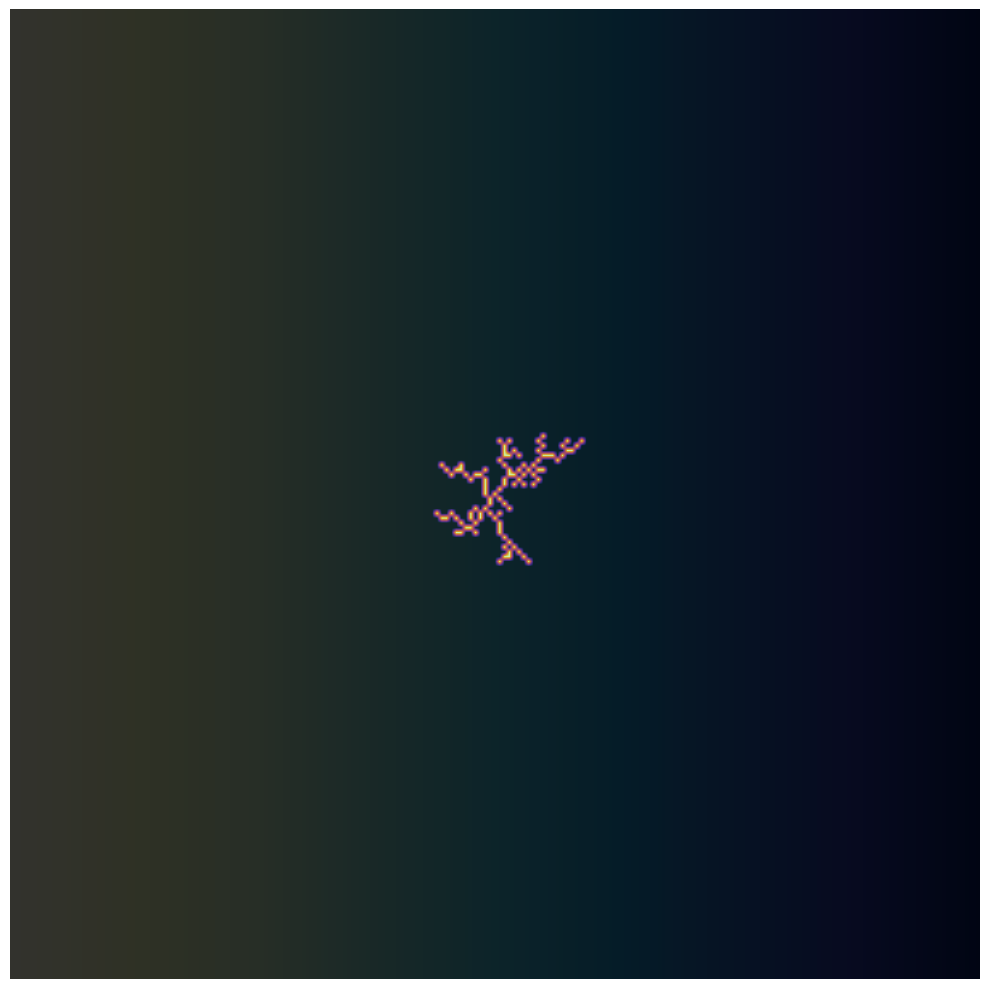

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def random_walk(seed):
    """Perform a random walk until it hits the seed."""
    x, y = np.random.choice(seed.shape[0]), np.random.choice(seed.shape[1])
    while seed[x, y] == 0:
        direction = np.random.choice(['up', 'down', 'left', 'right'])
        if direction == 'up':
            x = (x - 1) % seed.shape[0]
        elif direction == 'down':
            x = (x + 1) % seed.shape[0]
        elif direction == 'left':
            y = (y - 1) % seed.shape[1]
        else:
            y = (y + 1) % seed.shape[1]
        
        # Check if adjacent to the seed
        if (seed[max(x-1, 0):min(x+2, seed.shape[0]), max(y-1, 0):min(y+2, seed.shape[1])] == 1).any():
            seed[x, y] = 1
            break
    return seed

# Initialize the grid
grid_size = 201  # Increased grid size for better resolution
seed = np.zeros((grid_size, grid_size), dtype=int)
seed[grid_size // 2, grid_size // 2] = 1

# DLA simulation
num_walkers = 100  # Increased number of walkers for better coverage
for _ in range(num_walkers):
    seed = random_walk(seed)

# Apply Gaussian blurring for smoother edges
seed_smoothed = gaussian_filter(seed.astype(float), sigma=1.5)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(seed, cmap='inferno', interpolation='bilinear')
ax.axis('off')

# Add a subtle background gradient
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap('YlGnBu'), alpha=0.2, extent=ax.get_xlim()+ax.get_ylim())

plt.tight_layout()
plt.show()


/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/1651100382.py:49: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


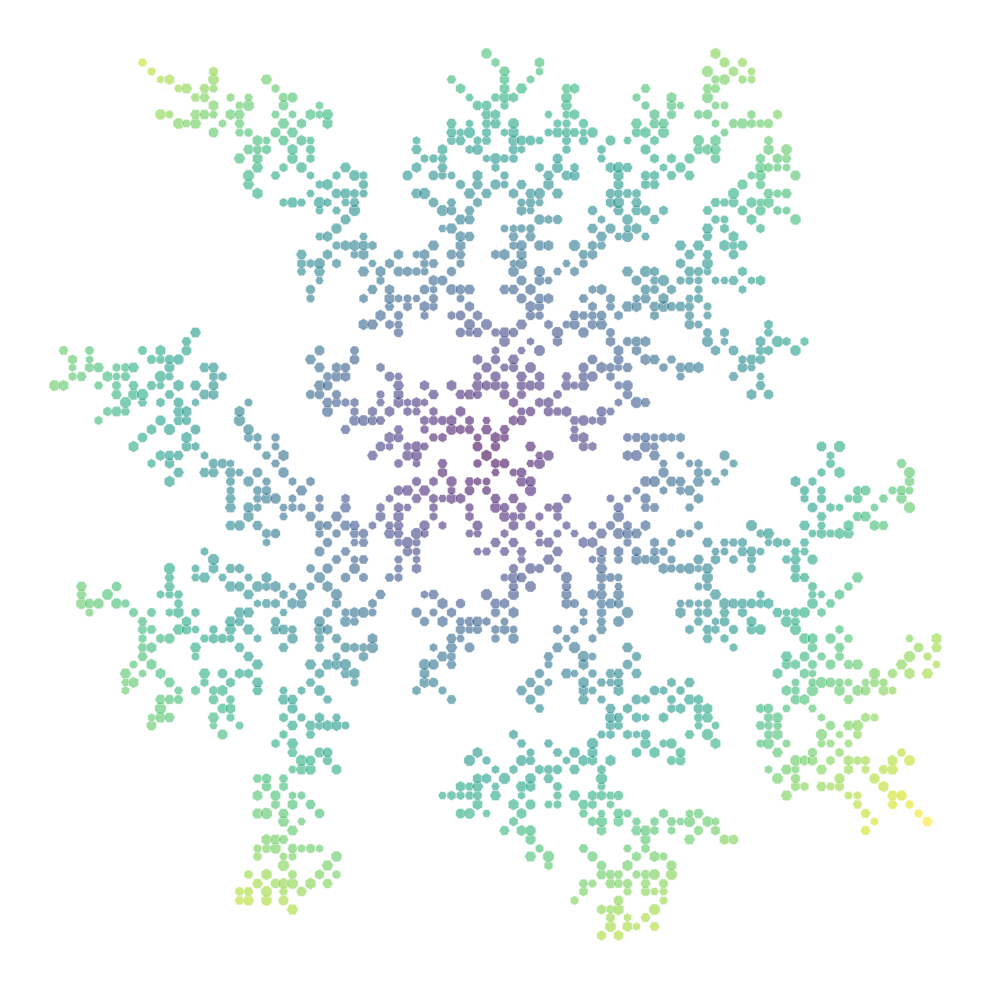

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_2D(seed, stick_coefficient=1.0):
    """Perform a 2D random walk until it hits the seed."""
    x, y = np.random.choice(seed.shape[0]), np.random.choice(seed.shape[1])
    while seed[x, y] == 0:
        direction = np.random.choice(['up', 'down', 'left', 'right'])
        if direction == 'up':
            y = (y + 1) % seed.shape[1]
        elif direction == 'down':
            y = (y - 1) % seed.shape[1]
        elif direction == 'left':
            x = (x - 1) % seed.shape[0]
        else:
            x = (x + 1) % seed.shape[0]
        
        # Check if adjacent to the seed
        if (seed[max(x-1, 0):min(x+2, seed.shape[0]), max(y-1, 0):min(y+2, seed.shape[1])] == 1).any():
            # Check stickiness
            if np.random.random() < stick_coefficient:
                seed[x, y] = 1
                break
    return seed


# Initialize the grid
grid_size = 111
seed = np.zeros((grid_size, grid_size), dtype=int)
center = grid_size // 2
seed[center, center] = 1

# DLA simulation
num_walkers = 5000
for _ in range(num_walkers):
    seed = random_walk_2D(seed, stick_coefficient=0.1)

# Extract coordinates for plotting and compute distances for hue
x, y = np.where(seed == 1)
distances = np.sqrt((x - center)**2 + (y - center)**2)

# Normalize distances to [0, 1]
norm_distances = distances / distances.max()

# Get colors from the colormap
colors = plt.cm.viridis(norm_distances)

# Plotting
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(10, 10))
sizes = np.random.randint(40, 80, size=len(x))
markers = np.random.choice(["8", "h", "H"], size=len(x))

for i in range(len(x)):
    ax.scatter(x[i], y[i], color=colors[i], s=sizes[i], alpha=0.6, edgecolors='w', linewidth=0.5, marker=markers[i])

ax.axis('off')
plt.tight_layout()
plt.show()

/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/1560704344.py:73: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/1560704344.py:74: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/1560704344.py:75: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/1560704344.py:76: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis

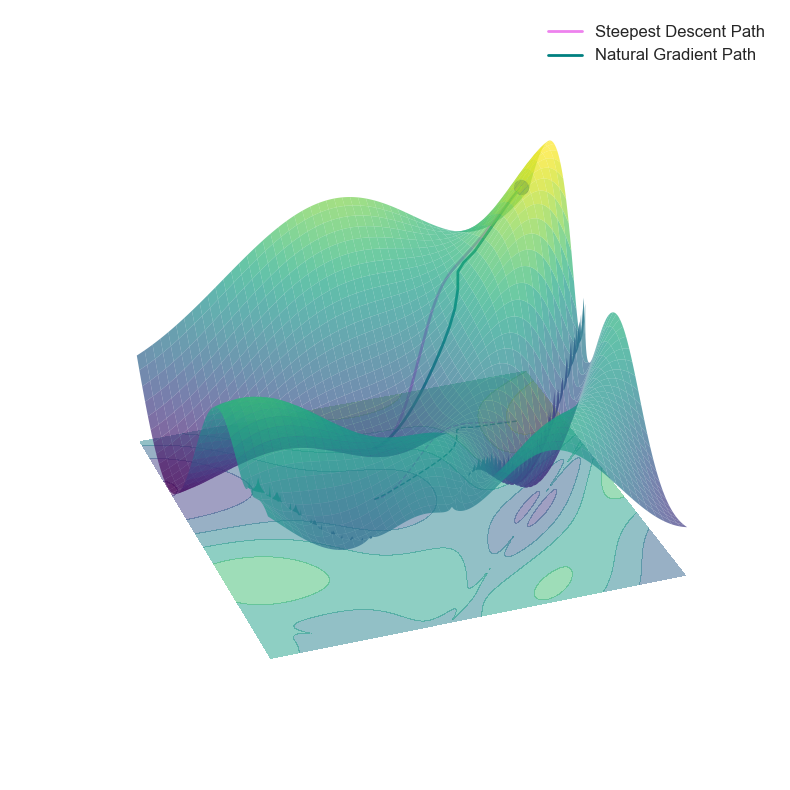

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# make seaborn background white instead of grey
import seaborn as sns
sns.set_style("white")


def eggholder_function(x, y):
    """Eggholder function."""
    return -(y + 47) * np.sin(np.sqrt(np.abs(x/2 + (y + 47)))) - x * np.sin(np.sqrt(np.abs(x - (y + 47))))

def gradient(x, y):
    """Approximate gradient of the Eggholder function using finite differences."""
    delta = 1e-5
    df_dx = (eggholder_function(x + delta, y) - eggholder_function(x - delta, y)) / (2 * delta)
    df_dy = (eggholder_function(x, y + delta) - eggholder_function(x, y - delta)) / (2 * delta)
    return np.array([df_dx, df_dy])

def curvature(x, y):
    """Approximate curvature (second derivative) of the Eggholder function using finite differences."""
    delta = 1e-5
    d2f_dx2 = (gradient(x + delta, y)[0] - gradient(x - delta, y)[0]) / (2 * delta)
    d2f_dy2 = (gradient(x, y + delta)[1] - gradient(x, y - delta)[1]) / (2 * delta)
    return np.array([d2f_dx2, d2f_dy2])

def gradient_descent(starting_point, learning_rate, num_iterations, method="steepest"):
    """Perform gradient descent or natural gradient descent based on the method."""
    path = []
    current_point = starting_point
    for _ in range(num_iterations):
        path.append(current_point)
        grad = gradient(*current_point)
        if method == "natural":
            curv = curvature(*current_point)
            grad = grad / (np.abs(curv) + 1e-8)  # Avoid division by zero
        current_point = current_point - learning_rate * grad
    return np.array(path)

# Create a grid of points
x = np.linspace(-40, 70, 400)
y = np.linspace(-40, 60, 400)
X, Y = np.meshgrid(x, y)
Z = eggholder_function(X, Y)

# Gradient Descent
starting_point = np.array([58, 38])
path_steepest = gradient_descent(starting_point, 0.1, 500, method="steepest")
path_natural = gradient_descent(starting_point, 0.1, 500, method="natural")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none', antialiased=True)
ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z), cmap='viridis', alpha=0.5)

# Trajectory in 3D
ax.plot(path_steepest[:, 0], path_steepest[:, 1], eggholder_function(path_steepest[:, 0], path_steepest[:, 1]), color='violet', linewidth=2.0, label='Steepest Descent Path')
ax.plot(path_natural[:, 0], path_natural[:, 1], eggholder_function(path_natural[:, 0], path_natural[:, 1]), color='teal', linewidth=2.0, label='Natural Gradient Path')

# Projected trajectory on the floor
ax.plot(path_steepest[:, 0], path_steepest[:, 1], np.min(Z)*np.ones_like(path_steepest[:, 1]), color='violet', linewidth=1.0, linestyle='--')
ax.plot(path_natural[:, 0], path_natural[:, 1], np.min(Z)*np.ones_like(path_natural[:, 1]), color='teal', linewidth=1.0, linestyle='--')

ax.scatter(*starting_point, eggholder_function(*starting_point), color='blue', s=100, zorder=5)

# Rotate the visualization on the z-axis by 90 degrees
ax.view_init(azim=-110)

# Aesthetic adjustments
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Save figure as pdf
fig.savefig('eggholder_comparison.pdf', bbox_inches='tight')


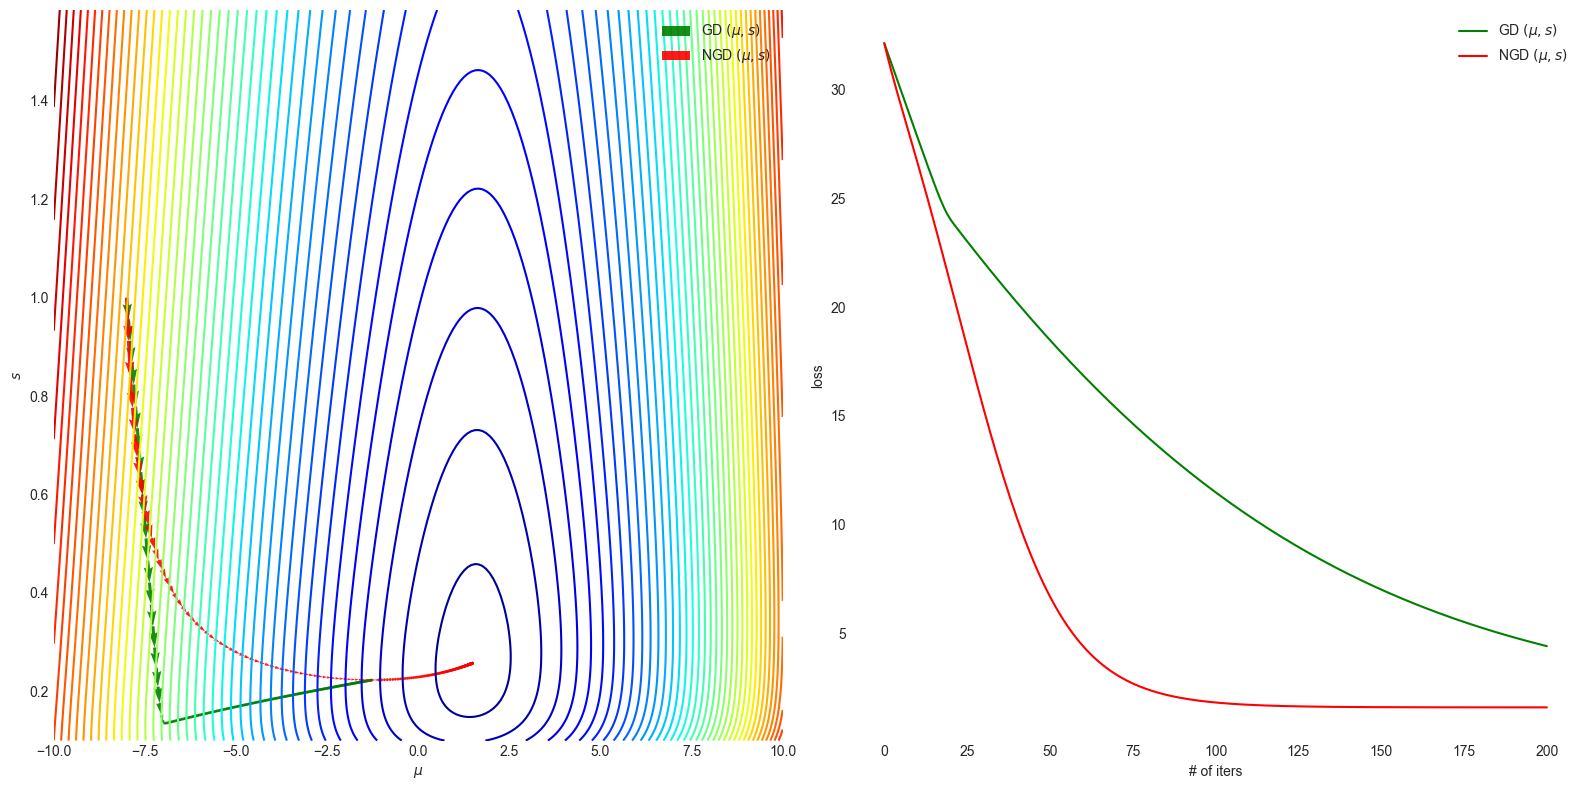

In [75]:
%matplotlib inline
from jax.config import config; config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jax import grad, jit, value_and_grad
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker, colors



@jit
def loss_lik(mu,v):
    b1 = 0.5; b2 = 0.01;
    a1 = 2.0; a2 = 5.0;
    ls = b1*(mu**2+v-2.0*a1*mu+a1**2)+b2*((mu**3+3.0*mu*v)-3.0*a2*(mu**2+v)+3.0*(a2**2)*mu-a2**3)+4.0/v
    return ls

@jit
def loss_pre(params):
    (mu,s) = params
    return loss_lik(mu,1.0/s) + jnp.log(s)/2

loss_f_pre = jit(value_and_grad(loss_pre))



def gd(init_params, loss_fun, step_size, num_iters):
    J_history = np.zeros(num_iters+1)
    mu_hist, s_hist = np.zeros(num_iters+1), np.zeros(num_iters+1) #For plotting  
    
    cur_params = init_params
    for i in range(num_iters):
        
        (val,g) = loss_fun(cur_params) #Euclidean gradient
        mu_hist[i] = cur_params[0]
        s_hist[i] = cur_params[1] 
        J_history[i] = val
        
        cur_params  = cur_params - step_size* g #GD

    (val,_) = loss_fun(cur_params)
    J_history[num_iters] = val
    mu_hist[num_iters] = cur_params[0]
    s_hist[num_iters] = cur_params[1] 

    return J_history, mu_hist, s_hist


def ngd_pre(init_params, loss_fun, step_size, num_iters):
    J_history = np.zeros(num_iters+1)
    mu_hist, s_hist = np.zeros(num_iters+1), np.zeros(num_iters+1) #For plotting  
    
    cur_params = init_params
    for i in range(num_iters):
        (mu,s)=cur_params
        (val,(g_mu,g_s)) = loss_fun(cur_params)
        ng = jnp.array( [g_mu/s, 2.0*(s**2)*g_s ] ) #Natural gradient

        mu_hist[i] = cur_params[0]
        s_hist[i] = cur_params[1] 
        J_history[i] = val
        
        cur_params  = cur_params - step_size* ng     #NGD
 
    (val,_) = loss_fun(cur_params)
    J_history[num_iters] = val
    mu_hist[num_iters] = cur_params[0]
    s_hist[num_iters] = cur_params[1] 

    return J_history, mu_hist, s_hist


#Setup of meshgrid of theta values
mu_list, s_list = np.meshgrid(np.linspace(-10,10,200),np.logspace(-1,0.2,800))

#Computing the cost function for each theta combination
zs = np.array(  [loss_pre( jnp.array([mu,s]) ) 
                     for mu,s in zip(np.ravel(mu_list), np.ravel(s_list)) ] )
Z = zs.reshape(mu_list.shape)
mu_0 = -8.0
s_0 = 1.0
max_num_iters = 200



init_params = jnp.array([mu_0,s_0])
gd_pre_history, mu_gd_pre_hist, s_gd_pre_hist = gd(init_params, loss_f_pre, step_size = 1e-2, 
                                                   num_iters=max_num_iters)
anglesx_gd_pre = np.array(mu_gd_pre_hist)[1:] - np.array(mu_gd_pre_hist)[:-1]
anglesy_gd_pre = np.array(s_gd_pre_hist)[1:] - np.array(s_gd_pre_hist)[:-1]


init_params = jnp.array([mu_0,s_0])
ngd_pre_history, mu_ngd_pre_hist, s_ngd_pre_hist = ngd_pre(init_params, loss_f_pre, step_size = 1e-2, 
                                                           num_iters=max_num_iters)
anglesx_ngd_pre = np.array(mu_ngd_pre_hist)[1:] - np.array(mu_ngd_pre_hist)[:-1]
anglesy_ngd_pre = np.array(s_ngd_pre_hist)[1:] - np.array(s_ngd_pre_hist)[:-1]



fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)

ax.contour(mu_list, s_list, Z, 50, cmap = 'jet')

ax.quiver(mu_gd_pre_hist[:-1], s_gd_pre_hist[:-1], anglesx_gd_pre, anglesy_gd_pre, 
          label='GD $(\mu,s)$', scale_units = 'xy', angles = 'xy', scale = 1, color = 'g', alpha = .9)

ax.quiver(mu_ngd_pre_hist[:-1], s_ngd_pre_hist[:-1], anglesx_ngd_pre, anglesy_ngd_pre, 
          label='NGD $(\mu,s)$', scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

ax.set_xlabel('$\mu$')
ax.set_ylabel('$s$')
ax.legend(loc='upper right')

ax = fig.add_subplot(1, 2, 2)
ax.plot(np.array(list(range(0, max_num_iters+1))),gd_pre_history,label='GD $(\mu,s)$',color='g')
ax.plot(np.array(list(range(0, max_num_iters+1))),ngd_pre_history,label='NGD $(\mu,s)$',color='r')
ax.legend(loc='upper right')
ax.set_xlabel('# of iters')
ax.set_ylabel('loss')

plt.tight_layout()
plt.show()

/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/1621528738.py:36: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/1621528738.py:37: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/1621528738.py:38: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/gg/pt9rjjws0_b60pgd3qk984140000gn/T/ipykernel_19319/1621528738.py:39: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis

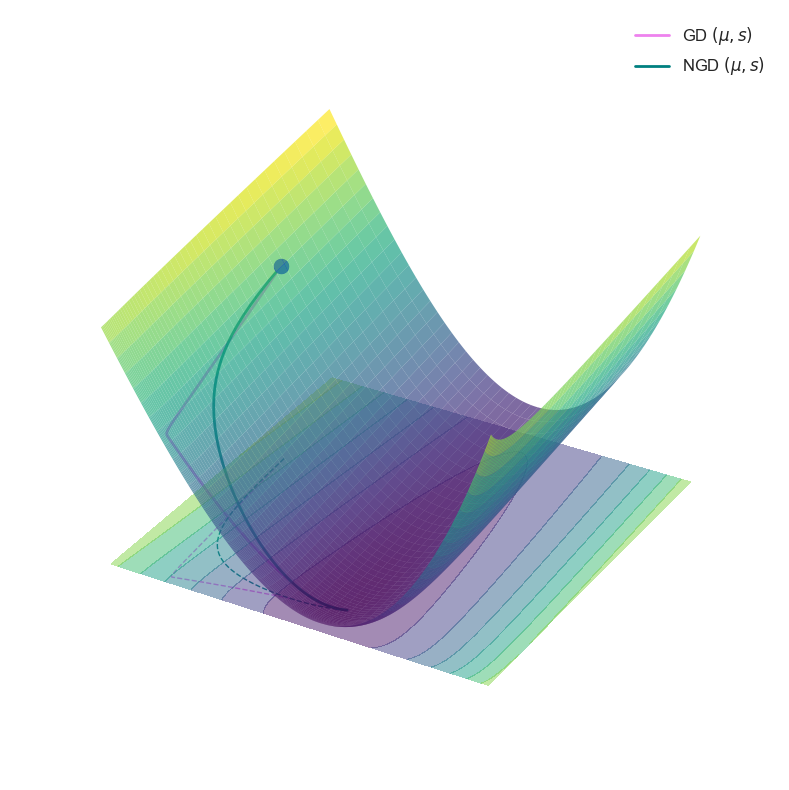

In [78]:
fig = plt.figure(figsize = (16,8))

# Modify this part for 3D plot
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(mu_list, s_list, Z, cmap='viridis', alpha=0.7, edgecolor='none', antialiased=True)
ax.contourf(mu_list, s_list, Z, zdir='z', offset=np.min(Z), cmap='viridis', alpha=0.5)

# GD path on the 3D surface
ax.plot(mu_gd_pre_hist, s_gd_pre_hist, [loss_pre(jnp.array([mu,s])) for mu, s in zip(mu_gd_pre_hist, s_gd_pre_hist)], 
        color='violet', linewidth=2.0, label='GD $(\mu,s)$')

# NGD path on the 3D surface
ax.plot(mu_ngd_pre_hist, s_ngd_pre_hist, [loss_pre(jnp.array([mu,s])) for mu, s in zip(mu_ngd_pre_hist, s_ngd_pre_hist)], 
        color='teal', linewidth=2.0, label='NGD $(\mu,s)$')

# Projected trajectory on the floor
ax.plot(mu_gd_pre_hist, s_gd_pre_hist, np.min(Z)*np.ones_like(s_gd_pre_hist), color='violet', linewidth=1.0, linestyle='--')
ax.plot(mu_ngd_pre_hist, s_ngd_pre_hist, np.min(Z)*np.ones_like(s_ngd_pre_hist), color='teal', linewidth=1.0, linestyle='--')

# Starting point
ax.scatter(mu_0, s_0, loss_pre(jnp.array([mu_0, s_0])), color='blue', s=100, zorder=5)


# Starting point
ax.scatter(mu_0, s_0, loss_pre(jnp.array([mu_0, s_0])), color='blue', s=100, zorder=5)

# Rotate the visualization on the z-axis by 90 degrees
#ax.view_init(azim=-110)

# Aesthetic adjustments
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()


fig.savefig('eggholder_comparison.pdf', bbox_inches='tight')
        

To prove that $ \text{var}(Xb) = X \text{var}(b) X^T $, we'll use properties of variance and covariance.

Let's start with the definition of variance for a matrix-vector product:

$ \text{var}(Xb) = E[(Xb - E[Xb])(Xb - E[Xb])^T] $

Now, let's expand the expression:

$ \text{var}(Xb) = E[Xb b^T X^T - Xb E[b]^T X^T - E[Xb] b^T X^T + E[Xb] E[b]^T X^T] $

Given that $ E[Xb] = XE[b] $ (because $ X $ is a constant matrix), the equation becomes:


$ \text{var}(Xb) = E[Xbb^TX^T] - XE[b]E[b]^TX^T - XE[b]b^T X^T + XE[b]E[b]^TX^T $

Notice that the terms $ - XE[b]b^T X^T $ and $ + XE[b]E[b]^TX^T $ cancel out,

$ \text{var}(Xb) = E[Xbb^TX^T] - XE[b]E[b]^TX^T $

Now, the covariance of $ b $ is:

$ \text{cov}(b) = E[bb^T] - E[b]E[b]^T $

So, $ E[bb^T] = \text{cov}(b) + E[b]E[b]^T $

Substituting this into our equation, we get:

$ \text{var}(Xb) = X(\text{cov}(b) + E[b]E[b]^T)X^T - XE[b]E[b]^TX^T $

$ \text{var}(Xb) = X\text{cov}(b)X^T $

Given that the covariance of a vector with itself is its variance, we can write:

$ \text{cov}(b) = \text{var}(b) $

Substituting this in, we get:

$ \text{var}(Xb) = X\text{var}(b)X^T $

And that completes the proof.

In [ ]:
Certainly! Let's break down the step.

Given the expression for the variance of \(Xb\):

\[ \text{var}(Xb) = E[(Xb - E[Xb])(Xb - E[Xb])^T] \]

Expanding the product inside the expectation:

\[ (Xb - E[Xb])(Xb - E[Xb])^T = Xbb^TX^T - XbE[b]^TX^T - E[Xb]b^T X^T + E[Xb]E[b]^TX^T \]

Now, let's focus on the term \(E[Xb]\):

\[ E[Xb] = E[X \cdot b] \]

Since \(X\) is a constant matrix (i.e., it doesn't have any random elements), it can be pulled out of the expectation:

\[ E[Xb] = X \cdot E[b] \]

This is a property of expectations: the expectation of a constant times a random variable is the constant times the expectation of the random variable.

Now, substituting this result into our expanded product, we get:

\[ \text{var}(Xb) = E[Xbb^TX^T] - XE[b]E[b]^TX^T - XE[b]b^T X^T + XE[b]E[b]^TX^T \]

Notice that the terms \( - XE[b]b^T X^T \) and \( + XE[b]E[b]^TX^T \) cancel out, leaving us with:

\[ \text{var}(Xb) = E[Xbb^TX^T] - XE[b]E[b]^TX^T \]

And that's how we arrive at the given equation.

**Gradient-based Optimization Techniques: Exercises**

**Objective:** Understand the underlying principles of different gradient-based optimization techniques, implement them, and analyze their performance on benchmark functions.

---

**Exercise 1: Implementing Steepest Descent (Gradient Descent)**
1. Derive the update rule for the steepest descent method.
2. Implement the steepest descent algorithm.
3. Test your implementation on the quadratic bowl function: \(f(x) = x^2 + y^2\).

---

**Exercise 2: Implementing Momentum Optimization**
1. Research and understand the momentum update rule.
2. Implement the momentum optimization algorithm.
3. Test your implementation on the Rosenbrock function:
\[f(x,y) = (1-x)^2 + 100(y-x^2)^2\]
   
   Note: The momentum method can overcome the slow convergence in the narrow valleys of the Rosenbrock function better than vanilla gradient descent.

---

**Exercise 3: Implementing Adagrad**
1. Understand the Adagrad update rule and its advantage in terms of adaptive learning rates.
2. Implement the Adagrad algorithm.
3. Test your implementation on a function with heterogeneous curvature, such as:
\[f(x,y) = x^2 + 50y^2\]
   
   Note: Adagrad is known to adapt its learning rates based on the historic gradient information. It should perform better than vanilla gradient descent on functions with significant curvature differences in different dimensions.

---

**Exercise 4: Implementing Adam**
1. Research and understand the Adam optimization update rule, focusing on the combination of momentum and RMSprop.
2. Implement the Adam algorithm.
3. Test your implementation on the Eggholder function:
\[f(x,y) = -(y+47)\sin(\sqrt{|x/2+(y+47)|})-x\sin(\sqrt{|x-(y+47)|})\]

   Note: The Eggholder function has several local minima. Adam, with its combination of momentum and adaptive learning rates, is generally able to navigate complex landscapes more effectively than other methods.

---

**Exercise 5: Comparative Analysis**
1. Run each of the optimization algorithms on all the functions.
2. Analyze the convergence speed, final solution quality, and any other relevant metrics.
3. Plot the convergence trajectories of the algorithms on each function. Observe how each algorithm navigates the function landscapes.

---

**Exercise 6: Discussion & Conclusions**
1. Which methods converge faster on which functions, and why?
2. Are there functions where certain methods seem to get stuck or converge to suboptimal solutions?
3. What's the significance of adaptive learning rates in complex landscapes?

---

**Tips & Considerations**
1. For all methods, consider implementing a diminishing learning rate (e.g., learning rate decay) for better convergence properties.
2. Play with hyperparameters such as the initial learning rate, momentum coefficients, and others to see their impact on convergence.
3. Remember, real-world functions might not always have one "best" optimization algorithm. The choice can depend on the nature of the function, the presence of noise, and other factors. This exercise should give students an intuition about the strengths and weaknesses of each method.

---

This exercise set aims to provide students with a hands-on experience in understanding, implementing, and analyzing gradient-based optimization techniques. Encourage students to collaborate, discuss, and dive deep into the nuances of each method and its performance on the benchmark functions.

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Quadratic Bowl
def quadratic_bowl(x):
    return x[0]**2 + x[1]**2

def quadratic_bowl_gradient(x):
    return np.array([2*x[0], 2*x[1]])

# Rosenbrock
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def rosenbrock_gradient(x):
    dx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
    dx1 = 200 * (x[1] - x[0]**2)
    return np.array([dx0, dx1])

# Heterogeneous curvature
def hetero_curve(x):
    return x[0]**2 + 50*x[1]**2

def hetero_curve_gradient(x):
    return np.array([2*x[0], 100*x[1]])

# Eggholder
def eggholder(x):
    return -(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1] + 47)))) - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1] + 47))))

def eggholder_gradient(x):
    # It's a complex function, so numerical gradients might be easier.
    epsilon = 1e-5
    dx = (eggholder(x + [epsilon, 0]) - eggholder(x)) / epsilon
    dy = (eggholder(x + [0, epsilon]) - eggholder(x)) / epsilon
    return np.array([dx, dy])


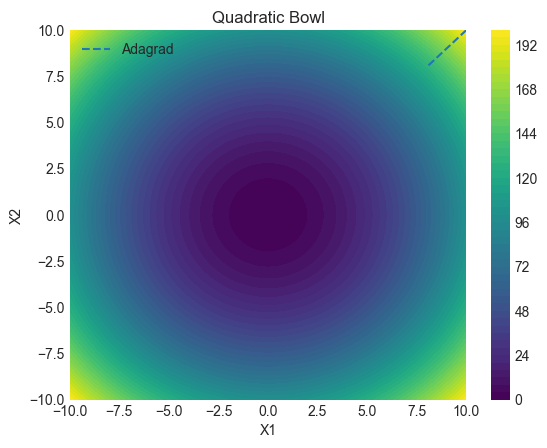

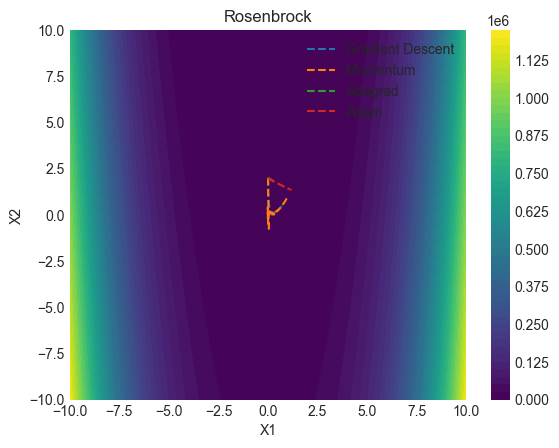

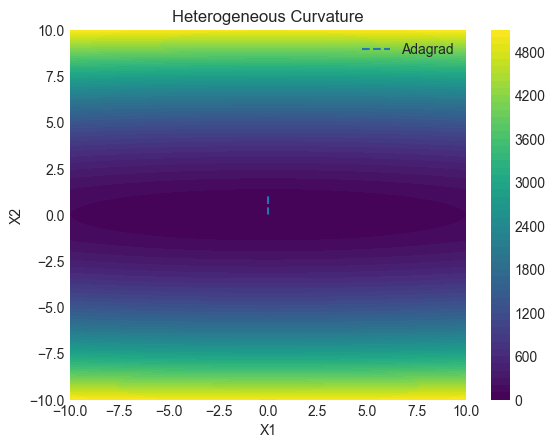

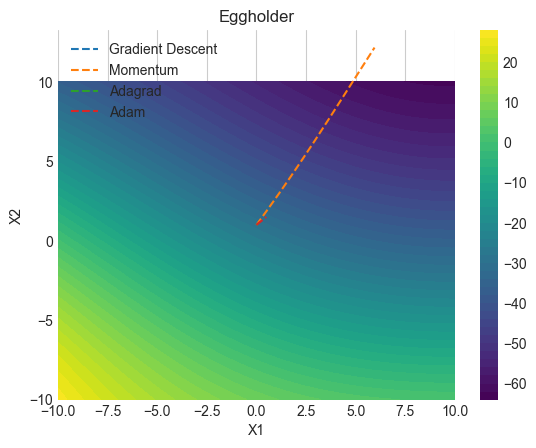

In [140]:
def clip_gradient(gradient, clip_value):
    norm = np.linalg.norm(gradient)
    if norm > clip_value:
        return (clip_value / norm) * gradient
    return gradient



def gradient_descent(func, grad_func, x0, lr=0.01, max_iters=1000, tol=1e-6):
    x = x0.copy()
    trajectory = [x]
    
    for i in range(max_iters):
        gradient = grad_func(x)
        gradient = clip_gradient(gradient, 50)  # Clip gradient

        x = x - lr * gradient
        trajectory.append(x)
        if np.linalg.norm(gradient) < tol:
            break
            
    return x, trajectory


def momentum_optimization(func, grad_func, x0, lr=0.01, gamma=0.9, max_iters=1000, tol=1e-6):
    x = x0.copy()
    trajectory = [x]
    v = np.zeros_like(x)
    
    for i in range(max_iters):
        gradient = grad_func(x)
        gradient = clip_gradient(gradient, 50)  # Clip gradient

        v = gamma * v + lr * gradient
        x = x - v
        trajectory.append(x)
        if np.linalg.norm(gradient) < tol:
            break
            
    return x, trajectory


def adagrad(func, grad_func, x0, lr=0.01, epsilon=1e-8, max_iters=10000, tol=1e-6):
    x = x0.copy()

    trajectory = [x]
    g_accumulated = np.zeros_like(x)
    
    for i in range(max_iters):
        gradient = grad_func(x)
        #gradient = clip_gradient(gradient, 50)  # Clip gradient
        g_accumulated += gradient**2
        x = x - lr * gradient / (np.sqrt(g_accumulated) + epsilon)
        trajectory.append(x)
        if np.linalg.norm(gradient) < tol:
            break
            
    return x, trajectory


def adam(func, grad_func, x0, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iters=1000, tol=1e-6):
    x = x0.copy()
    trajectory = [x]
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    
    for i in range(max_iters):
        gradient = grad_func(x)
        gradient = clip_gradient(gradient, 50)  # Clip gradient

        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * gradient**2
        m_corrected = m / (1 - beta1**(i+1))
        v_corrected = v / (1 - beta2**(i+1))
        x = x - lr * m_corrected / (np.sqrt(v_corrected) + epsilon)
        trajectory.append(x)
        if np.linalg.norm(gradient) < tol:
            break
            
    return x, trajectory


import numpy as np
import matplotlib.pyplot as plt

# ... [Previously defined functions and optimization methods go here]

# Helper function to plot contours and trajectories
def plot_contours_and_trajectory(func, trajectories, title):
    # Create a grid for contour plotting
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func([X[i, j], Y[i, j]])
    
    # Plot the contour
    plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.colorbar()
    
    # Plot the trajectories
    for traj, label in trajectories:
        traj_array = np.array(traj)
        plt.plot(traj_array[:, 0], traj_array[:, 1], '--', label=label)
    
    plt.title(title)
    plt.legend()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.show()

# Define the list of functions and their gradients
functions = [
    (quadratic_bowl, quadratic_bowl_gradient, "Quadratic Bowl"),
    (rosenbrock, rosenbrock_gradient, "Rosenbrock"),
    (hetero_curve, hetero_curve_gradient, "Heterogeneous Curvature"),
    (eggholder, eggholder_gradient, "Eggholder")
]



def adjusted_methods(func_name):
    # A generic configuration
    methods = [
        #(lambda f, g, x0: gradient_descent(f, g, x0, lr=0.01), "Gradient Descent"),
        #(lambda f, g, x0: momentum_optimization(f, g, x0, lr=0.01, gamma=0.9), "Momentum"),
        (lambda f, g, x0: adagrad(f, g, x0, lr=0.01), "Adagrad"),
        #(lambda f, g, x0: adam(f, g, x0, lr=0.01), "Adam")
    ]
    
    if func_name == "Rosenbrock":
        methods = [
            (lambda f, g, x0: gradient_descent(f, g, x0, lr=0.001), "Gradient Descent"),
            (lambda f, g, x0: momentum_optimization(f, g, x0, lr=0.001, gamma=0.9), "Momentum"),
            (lambda f, g, x0: adagrad(f, g, x0, lr=0.001), "Adagrad"),
            (lambda f, g, x0: adam(f, g, x0, lr=0.001), "Adam")
        ]
    elif func_name == "Eggholder":
        methods = [
            (lambda f, g, x0: gradient_descent(f, g, x0, lr=0.0005), "Gradient Descent"),
            (lambda f, g, x0: momentum_optimization(f, g, x0, lr=0.0005, gamma=0.9), "Momentum"),
            (lambda f, g, x0: adagrad(f, g, x0, lr=0.0005), "Adagrad"),
            (lambda f, g, x0: adam(f, g, x0, lr=0.0005), "Adam")
        ]
    
    return methods

# Adjusted initial positions:
def adjusted_initial_position(func_name):
    if func_name == "Rosenbrock":
        return np.array([0.0, 2.0])
    elif func_name == "Eggholder":
        return np.array([0.0, 1.0])  # Modified for a better starting point
    elif func_name == "Heterogeneous Curvature":
        return np.array([0.0, 1.0])
    elif func_name == "Quadratic Bowl":
        return np.array([10.0, 10.0])

# Plotting loop
for func, grad_func, func_name in functions:
    trajectories = []
    x0 = adjusted_initial_position(func_name)
    methods = adjusted_methods(func_name)
    for method, method_name in methods:
        _, traj = method(func, grad_func, x0)
        trajectories.append((traj, method_name))
    plot_contours_and_trajectory(func, trajectories, func_name)



In [145]:
x = np.linspace(0, 10, 11)
y = np.linspace(0, 10, 11)

X, Y = np.meshgrid(x, y)


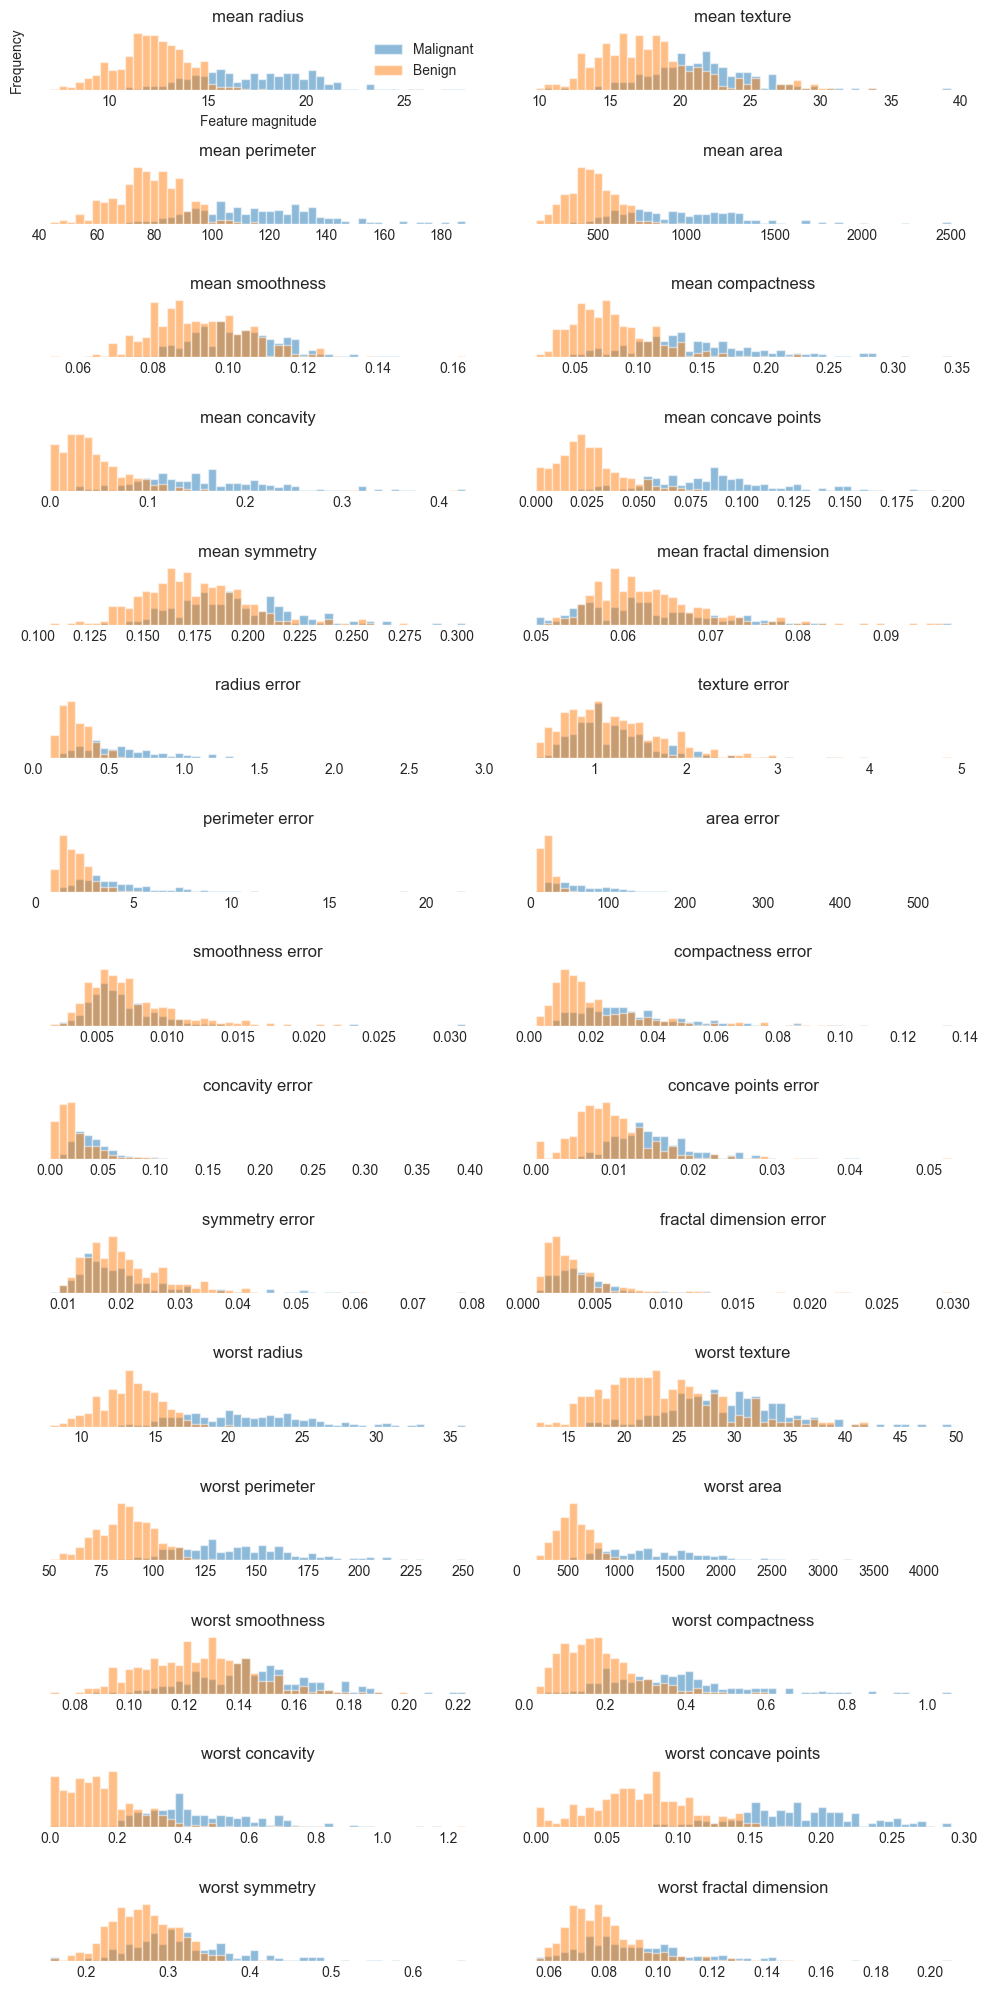

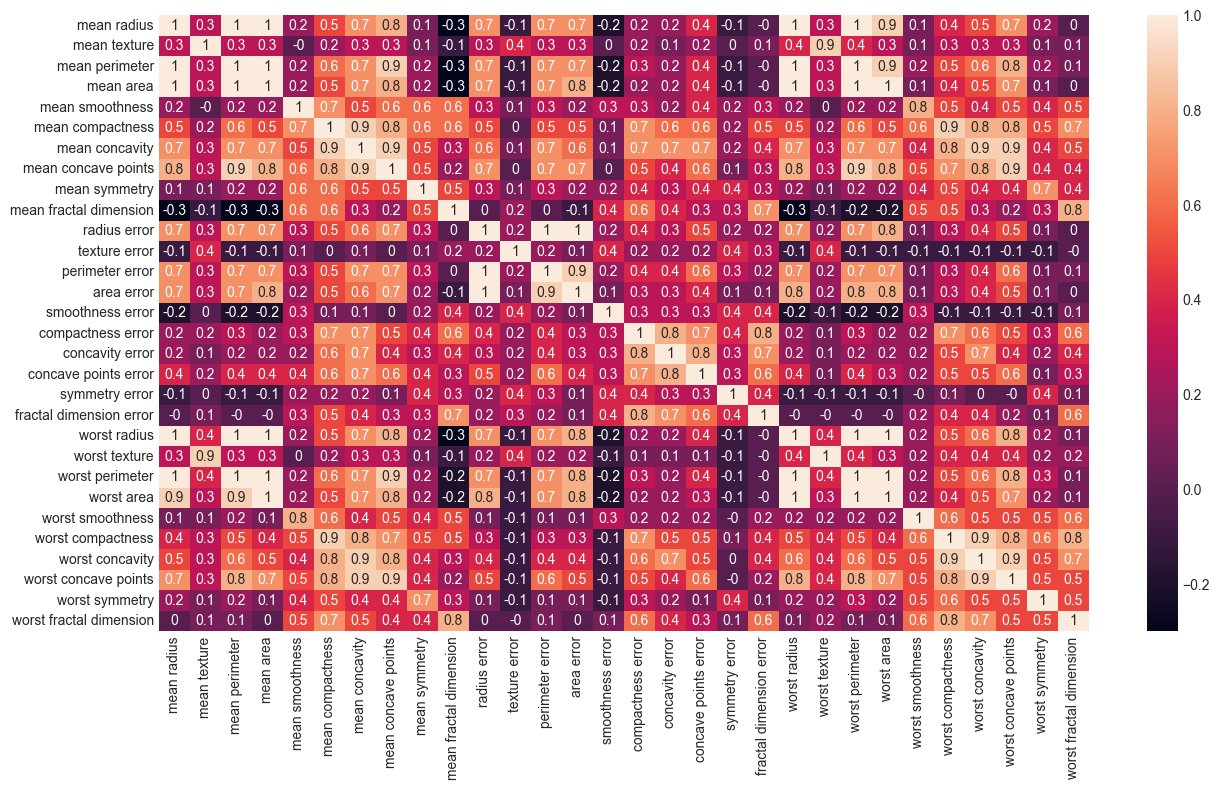

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
import pandas as pd
# Making a data frame
cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)

fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins =50)
    ax[i].hist(malignant[:,i], bins = bins, alpha = 0.5)
    ax[i].hist(benign[:,i], bins = bins, alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Malignant", "Benign"], loc ="best")
fig.tight_layout()
plt.show()

import seaborn as sns
correlation_matrix = cancerpd.corr().round(1)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

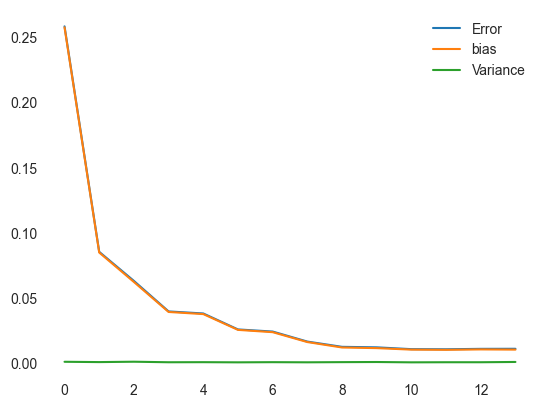

In [223]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(201)

n = 400
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()


    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    #print('Polynomial degree:', degree)
    #print('Error:', error[degree])
    #print('Bias^2:', bias[degree])
    #print('Var:', variance[degree])
    #print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)
(8, 1) (8, 1)


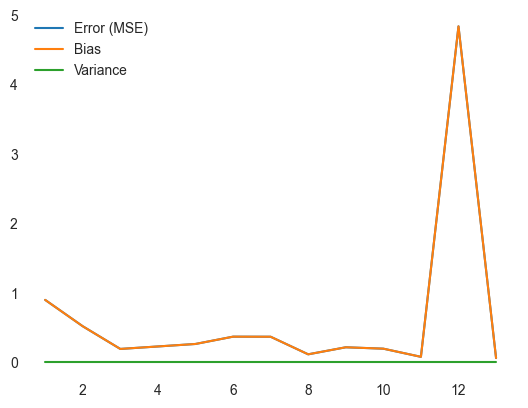

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]


In [220]:
np.random.seed(2018)
n = 40
#n_boostraps = 100

maxdegree = 14  # 15 degree poly
polydegree = np.array(range(1, maxdegree))

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree-1)
bias = np.zeros(maxdegree-1)
variance = np.zeros(maxdegree-1)

X = np.zeros((n, maxdegree))
for degree in polydegree:
    X[:, degree] = x[:, 0]**degree
def MSE(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

from sklearn.metrics import mean_squared_error
for degree in polydegree:
    # Split data:
    X_train, X_test, y_train, y_test = train_test_split(X[:, :degree], y, test_size=0.2)
    linreg = LinearRegression(fit_intercept=False)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(y_pred.shape, y_test.shape)
    # error[degree-1] = mean_squared_error(y_test, y_pred)
    error[degree-1] = np.mean(MSE(y_test, y_pred))
    bias[degree-1] = (np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True)) ** 2))
    variance[degree-1] = np.mean(np.var(y_pred, axis=1))  # np.mean(np.var(y_pred, axis=1, keepdims=True))

    # print('Polynomial degree:', degree)
    # print('Error (MSE):', error[degree-1])
    # print('Bias^2:', bias[degree-1])
    # print('Var:', variance[degree-1])
    # print('{} >= {} + {} = {}'.format(error[degree-1], bias[degree-1], variance[degree-1], bias[degree-1] + variance[degree-1]))
    #print(np.shape(np.mean(y_pred, axis=1, keepdims=True)))

plt.plot(polydegree, error, label='Error (MSE)')
plt.plot(polydegree, bias, label='Bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()
print(error == bias)

In [226]:
params = [1, 2, 3]
grads = [4, 5, 6]


for i, grad in enumerate(grads):
    params[i] += grad

print(params)


[5, 7, 9]
